(pvt-sec-stability)=
# Определение стабильности фазового состояния системы

В данном разделе будут представлены критерии стабильности фазового состояния системы, позволяющие определить, является ли рассматриваемое фазовое состояние системы стабильным для различных формулировок ([PT-термодинамика](#pvt-sec-stability-pt) и [VT-термодинамика](pvt-sec-stability-vt)), а также численные алгоритмы и их реализации. Выбор той или иной формулировки зачастую определяется теми переменными, через которые удобнее выражать уравнение состояния. Проверка стабильности фазового равновесия является первым из двух последовательных шагов к определению равновесного фазового состояния системы.

(pvt-sec-stability-pt)=
## PT-термодинамика

Пусть некоторая многокомпонентная макроскопическая система находится в равновесном состоянии и характеризуется давлением $P$, температурой $T$ и количеством вещества всех компонентов $n_i, \; i=1..N_c$, где $N_c$ – число компонентов, составляющих рассматриваемую систему. Можем ли мы использовать некоторое уравнение состояния для описания взаимосвязей между термодинамическими параметрами? Ответ на этот вопрос зависит от того, является ли рассматриваемая система гомогенной, то есть состоящей из одной сплошной фазы. Иными словами, является ли однофазное состояние рассматриваемой системы *стабильным*. Именно исследованию данного вопроса будет посвящен настоящий раздел. Однако, прежде чем переходить к рассмотрению темы стабильности фазового состояния системы, необходимо ввести ряд определений. Некоторые из них будут перекликаться с рассмотренными ранее темами, но при этом являться более обобщенными. Теоретическое изложение рассматриваемой проблемы соответствует работе \[[Baker et al, 1982](https://doi.org/10.2118/9806-PA)\].

```{admonition} Определение
:class: tip
Пусть имеется некоторая $j$-ая фаза, многофазной системы, состоящая из $N_c$ компонентов, при этом количество вещества компонентов в фазе $j$ определяется следующим [вектором](../../0-Math/0-LAB/LAB-1-Vectors.md):

$$ \mathbf{n}^j = \begin{bmatrix} n_1^j \\ n_2^j \\ \vdots \\ n_{N_c}^j \end{bmatrix}. $$

Если количество вещества компонентов в системе в целом определяется вектором

$$ \mathbf{n} = \begin{bmatrix} n_1 \\ n_2 \\ \vdots \\ n_{N_c} \end{bmatrix}, $$

то фаза $j$ является ***допустимой*** *(admissible)*, если

$$ 0 < n_i^j < n_i, \; i = 1 \ldots N_c.$$
```

Иными словами, фаза является *допустимой*, если количество вещества каждого компонента, в нее входящего, меньше количества вещества этого же компонента в системе в целом. Все дальнейшие выкладки будут касаться допустимых фаз, в которых представлены все компоненты, не взаимодействующие друг с другом с образованием новых компонентов, то есть не вступающие в реакции. Кроме того, необходимо отметить, что здесь и далее нижний индекс будет характеризовать некоторый компонент, а верхних – некоторую фазу. Для допустимых фаз справедливо следущее соотношение:

$$ \sum_{j=1}^{N_p} n_i^j = n_i, $$

где $N_p$ – количество фаз в системе. При известных и заданных давлении и температуре рассматриваемой системы, а также количествах вещества компонентов в ней [энергия Гиббса](../1-TD/TD-10-MixtureGibbsEnergy.md) некоторой фазы определяется количеством вещества каждого компонента в фазе, то есть:

$$ G^j = G^j \left( \mathbf{n}^j \right). $$

Учитывая [экстенсивность](../1-TD/TD-9-Observables.md#pvt-td-observables-extensive) энергии Гиббса, для многофазной системы справедливо следующее соотношение:

$$ G \left( \mathbf{n} \right) = G \left( \mathbf{n}^1, \, \mathbf{n}^2, \, \ldots \, , \mathbf{n}^j \right) = \sum_{j=1}^{N_p} G^j \left( \mathbf{n}^j \right). $$

```{admonition} Определение
:class: tip
Некоторое $\hat{K}$ состояние системы, характеризующееся $N_p$ количеством *допустимых* фаз, удовлетворяющих закону сохранения масс, является ***равновесным***, если:

$$ G \left( \hat{K} \right) = \min_l G^l \left( \hat{L} \right), $$

где минимум берется по всем состояниям $\hat{L}$, характеризующимся $K_p$ количеством *допустимых* фаз, удовлетворяющих закону сохранения масс.

```

В данном определении необходимо отметить два момента. Первый: *равновесное состояние* характеризуется минимумом энергии Гиббса всей многофазной системы. Более подробно это рассматривалось [ранее](../1-TD/TD-14-PhaseEquilibrium.md). Второй: для того чтобы доказать, что некоторое состояние $\hat{K}$ многофазной системы из $N_p$ является *равновесным*, мы можем рассмотреть множество других состояний $\hat{L}$, каждое из которых будет характеризоваться своим количеством фаз $K_p$, и если в состоянии $\hat{K}$ с количеством фаз $N_p$ энергия Гиббса меньше всего, то оно и будет равновесным.

Представленное в предыдущем определении условие идентификации равновесного состояния, по сути, аналогично условию нахождения [глобального минимума функции](https://en.wikipedia.org/wiki/Maximum_and_minimum). [Известно](https://en.wikipedia.org/wiki/First_derivative_test), что необходимым условием для соответствия некоторого точки (состояния) глобальному минимуму функции (энергии Гиббса) является равенство нулю производной в этой точке (этом состоянии). Такое состояние, в котором энергия Гиббса всей многофазной многокомпонентной системы характеризуется равенством нулю частной производной по количеству вещества $i$-го компонента в $j$-ой фазе при фиксированных давлении и температуре будет характеризоваться равенством химических потенциалов соответствующих компонентов в фазах.

```{admonition} Теорема
:class: danger
Пусть многофазная многокомпонентная система находится при фиксированных давлении $P$, температуре $T$ и количествах вещества компонентов в ней $n_i, \; i=1 \, \ldots \, N_c$ в некотором состоянии $\hat{K}$ с количеством фаз $N_p$ с соответствующими количествами вещества компонентов $n_i^j, \; i = 1 \, \ldots \, N_c, \; j = 1 \, \ldots \, N_p$. При этом, в этом состоянии частная производная энергии Гиббса всей системы по $n_i^j$ равна нулю:

$$ \left( \frac{\partial G}{\partial n_i^j} \right)_{P,T,n_k^l,k \neq i, l \neq j} = 0. $$

Тогда для такого состояния системы будет справедливо следующее равенство:

$$ \mu_i^j = \mu_i^{N_p}, \; i = 1 \, \ldots \, N_c, \; j = 1 \, \ldots \, N_p. $$
```

Докажем  это следующим образом.

```{admonition} Доказательство
:class: proof
Учитывая экстенсивность энергии Гиббса, преобразуем частную производную энергии Гиббса всей системы по $n_i^j$ следующим образом:

$$ \begin{align}
\left( \frac{\partial G}{\partial n_i^j} \right)_{P,T,n_k^l, k \neq i, l \neq j}
&= \frac{\partial}{\partial n_i^j} \left( \sum_{l=1}^{N_p} G^l \left( n_k^l \right) \right)_{P,T,n_k^l, k \neq i, l \neq j} \\
&= \frac{\partial}{\partial n_i^j} \left( \sum_{l=1}^{N_p-1} G^l \left( n_k^l \right) \right)_{P,T,n_k^l, k \neq i, l \neq j} + \left( \frac{\partial G^{N_p} \left( n_k^{N_p} \right)}{\partial n_i^j} \right)_{P,T,n_k^{N_p},k \neq i} \\
&= \sum_{l=1}^{N_p-1} \left( \frac{\partial G^l \left( n_k^l \right)}{\partial n_i^j} \right)_{P,T,n_k^l, k \neq i, l \neq j} + \left( \frac{\partial G^{N_p} \left( n_k^{N_p} \right)}{\partial n_i^j} \right)_{P,T,n_k^{N_p},k \neq i}.
\end{align} $$

Принимая во внимание, что энергия Гиббса $j$-й фазы зависит от количеств вещества компонентов в этой $j$-й фазе, то есть:

$$ \left( \frac{\partial G^l \left( n_k^l \right)}{\partial n_i^j} \right)_{P,T,n_k^l, k \neq i, l \neq j} = 0, \; l \neq j, $$

частная производная энергии Гиббса всей системы по $n_i^j$:

$$ \left( \frac{\partial G}{\partial n_i^j} \right)_{P,T,n_k^l, k \neq i, l \neq j} = \left( \frac{\partial G^j \left( n_k^j \right)}{\partial n_i^j} \right)_{P,T,n_k^j, k \neq i} + \left( \frac{\partial G^{N_p} \left( n_k^{N_p} \right)}{\partial n_i^j} \right)_{P,T,n_k^{N_p},k \neq i}. $$

Учитывая правило нахождение сложной функции, данное выражение преобразуется следующим образом:

$$ \left( \frac{\partial G}{\partial n_i^j} \right)_{P,T,n_k^l, k \neq i, l \neq j} = \left( \frac{\partial G^j \left( n_k^j \right)}{\partial n_i^j} \right)_{P,T,n_k^j, k \neq i} + \left( \frac{\partial n_k^{N_p}}{\partial n_i^j} \right)_{P,T,n_k^{N_p},k \neq i} \left( \frac{\partial G^{N_p} \left( n_k^{N_p} \right)}{\partial n_k^{N_p}} \right)_{P,T,n_k^{N_p},k \neq i}. $$

Выразим из закона сохранения масс количество вещества $k$-го компонента в $N_p$-й фазе:

$$ \sum_{l=1}^{N_p} n_k^l = n_k \Rightarrow n_k^{N_p} = n_k - \sum_{l=1}^{N_p-1} n_k^l. $$

Тогда частная прозводная количества вещества $k$-го компонента в $l$-й фазе по количеству вещества $i$-го компонента в $j$-ой фазе:

$$ \left( \frac{\partial n_k^{N_p}}{\partial n_i^j} \right)_{P,T,n_k^{N_p},k \neq i} = \left( \frac{\partial n_k}{\partial n_i^j} \right)_{P,T,n_k^{N_p},k \neq i} - \sum_{l=1}^{N_p-1} \left( \frac{\partial n_k^l}{\partial n_i^j} \right)_{P,T,n_k^l,k \neq i,l \neq j} $$

Первое слагаемое в данном выражении равно нулю, поскольку количество вещества каждого компонента в системе в целом зафиксировано. Второе слагаемое можно представить следующим образом:

$$ \left( \frac{\partial n_k^l}{\partial n_i^j} \right)_{P,T,n_k^l,k \neq i,l \neq j} = \begin{cases} 1 & \mathrm{if} \; k=i \land l=j, \; k=1 \ldots N_c, \, l=1 \ldots N_p, \\ 0 & \mathrm{if} \; k \neq i \lor l \neq j, \; k=1 \ldots N_c, \, l=1 \ldots N_p. \end{cases} $$

Таким образом,

$$ \left( \frac{\partial n_k^{N_p}}{\partial n_i^j} \right)_{P,T,n_k^{N_p},k \neq i} = \begin{cases} -1 & \mathrm{if} \; k=i \land j=N_p, \\ 0 & \mathrm{if} \; k \neq i \lor j \neq N_p. \end{cases} $$

С учетом этого частная производная энергии Гиббса всей системы по $n_i^j$:

$$ \left( \frac{\partial G}{\partial n_i^j} \right)_{P,T,n_k^l, k \neq i, l \neq j} = \left( \frac{\partial G^j \left( n_k^j \right)}{\partial n_i^j} \right)_{P,T,n_k^j, k \neq i} - \left( \frac{\partial G^{N_p} \left( n_k^{N_p} \right)}{\partial n_i^{N_p}} \right)_{P,T,n_k^{N_p},k \neq i} = 0. $$

Поскольку частная производная энергии Гиббса некоторой фазы по количеству вещества $i$-го компонента в этой фазе при фиксированных давлении и температуре [соответствует](../1-TD/TD-10-MixtureGibbsEnergy.md) химическому потенциалу $i$-го компонента в этой фазе, то:

$$ \mu_i^j - \mu_i^{N_p} = 0, \; i = 1 \, \ldots \, N_c, \; j = 1 \, \ldots \, N_p. $$

```

[Ранее](../1-TD/TD-15-Fugacity.md#pvt-td-fugacity-equilibrium) было показано, что для изотермического квази-стационарного процесса равенство химических потенциалов равносильно равенству летучестей.

Поскольу условие равенства нулю частной производной энергии Гиббса системы в целом по количеству вещества $i$-го компонента в $j$-ой фазе при фиксированных давлении и температуре является необходимым, но не достаточным, то рассматриваемая система может характеризоваться набором состояний, удовлетворяющих данному условию. Такие состояния будем называть *стационарными*.

```{admonition} Определение
:class: tip
Cостояние $\hat{L} = \left\{ \mathbf{n}^j, \; j = 1 \, \ldots K_p \right\}$ является ***стационарным***, если:

$$ \left( \frac{\partial G}{\partial n_i^j} \right)_{P,T,n_k^l,k \neq i, l \neq j} = 0, \; i=1 \, \ldots \, N_c, \; j = 1 \, \ldots K_p. $$

```

Таким образом, для того чтобы доказать, что некоторое состояние является равновесным, нет необходимости перебирать бесконечное множество всех возможных состояний системы – достаточно рассмотреть конечное множество стационарных состояний системы.

Центральным для анализа стабильности фазового состояния системы является положение, определяющее, что стационарное состояние системы может быть определено путем идентификации общих точек касательной [гиперплоскости](https://en.wikipedia.org/wiki/Hyperplane) к [гиперповерхности](https://en.wikipedia.org/wiki/Hypersurface), представленной функцией энергии Гиббса. Приставки "гипер" необходимы при рассмотрении $N_c$-мерного пространства. Например, для двух компонентов функция энергии Гиббса представляет собой кривую на плоскости, касательной к которой является прямая. Для трех компонентов функция энергии Гиббса представляет собой поверхность, а касательная к ней – плоскость. Для $N_c$ компонентов функция энергии Гиббса – гиперповерхность, касательная к ней – гиперплоскость. Далее под поверхностью и плоскостью будут пониматься именно гиперповерхность и гиперплоскость соответственно.

```{admonition} Теорема
:class: danger
Пусть $\hat{K}$ является некоторым состоянием системы, состоящей из $N_p$ допустимых фаз, удовлетворяющих закону сохранения масс, с известным количеством вещества компонентов в фазах $\mathbf{n}^j, \; j = 1 \, \ldots \, N_p$. Тогда $G \left( \hat{K} \right)$ является стационарной точкой тогда и только тогда, когда $G$ дифференциируема для всех $\mathbf{n}^j$ и поверхность $G$ имеет одинаковую касательную плоскость для каждого $\mathbf{n}^j$.
```

Приведем доказательство данной теоремы.

```{admonition} Доказательство
:class: proof
Пусть $L^j \left( \mathbf{r} \right)$ является касательной плоскостью к поверхности $G \left( \mathbf{r} \right)$ в точке $\mathbf{n}^j$, являющейся стационарной. Тогда [уравнение касательной](https://en.wikipedia.org/wiki/Tangent) плоскости $L^j \left( \mathbf{r} \right)$ к поверхности $G \left( \mathbf{r} \right)$ в точке $\mathbf{n}^j$ описывается следующим выражением:

$$ L^j \left( \mathbf{r} \right) = G \left( \mathbf{n}^j \right) + \sum_{i=1}^{N_c} \frac{\partial G}{\partial r_i} \bigg|_{n_i^j} \left( r_i - n_i^j \right). $$

Так как энергия Гиббса является экстенсивным параметром, то при фиксированных давлении и температуре для нее выполняется следующее [свойство](../1-TD/TD-10-MixtureGibbsEnergy.md):

$$ G \left( \mathbf{n}^j \right) = \sum_{i=1}^{N_c} \frac{\partial G}{\partial r_i} \bigg|_{n_i^j} n_i^j = \sum_{i=1}^{N_c} \mu_i^j n_i^j. $$

Подставляя данное выражение в уравнение касательной поверхности, получим:

$$ L^j \left( \mathbf{r} \right) = \sum_{i=1}^{N_c} \frac{\partial G}{\partial r_i} \bigg|_{n_i^j} n_i^j + \sum_{i=1}^{N_c} \frac{\partial G}{\partial r_i} \bigg|_{n_i^j} r_i - \sum_{i=1}^{N_c} \frac{\partial G}{\partial r_i} \bigg|_{n_i^j} n_i^j = \sum_{i=1}^{N_c} \frac{\partial G}{\partial r_i} \bigg|_{n_i^j} r_i = \sum_{i=1}^{N_c} \mu_i^j r_i. $$

Поскольку для стационарного состояния выполняется условие постоянства химического потенциала компонентов, то есть химический потенциал каждого компонента не зависит от фазы, то есть $\mu_i^j = \mu_i^{N_p}, \; i = 1 \, \ldots \, N_c, \; j = 1 \, \ldots \, N_p-1$ в соответствии с приведенной выше леммой, то $L^j \left( \mathbf{r} \right)$ также не будет зависеть от фазы $j$, следовательно, для всех $j$ в стационарном состоянии уравнение касательной плоскости к поверхности энергии Гиббса одинаково. Верно и обратное: если все $L^j$ одинаковы, то химические потенциалы компонентов равны, и состояние является стационарным.
```

Представленная выше теорема говорит о том, что в стационарном состоянии $\hat{K}$ касательная плоскость $L^j \left( \mathbf{r} \right)$ к поверхности энергии Гиббса $G \left( \mathbf{r} \right)$ одинакова для всех составов фаз $\mathbf{n}^j, \; j = 1 \, \ldots \, N_p$, выражающих рассматриваемое стационарное состояние $\hat{K} = \left\{ \mathbf{n}^j, \; j = 1 \, \ldots N_p \right\}$. Однако в конечном счете нам необходимо определить стабильность (равновесность) стационарного состояния. Для понимания того, является ли рассматриваемое стационарное состояние равновесным, необходимо ввести следующие обозначения.

Пусть $D \left( \mathbf{r} \right)$ является функцией разности между энергией Гиббса $G \left( \mathbf{r} \right)$ и функцией касательной плоскости к ней $L \left( \mathbf{r} \right)$:

$$ D \left( \mathbf{r} \right) = G \left( \mathbf{r} \right) - L \left( \mathbf{r} \right). $$

Для равновесного состояния (которое также является стационарным) в соответствии с представленной выше леммой преобразуем уравнение касательной плоскости:

$$ D \left( \mathbf{r} \right) = G \left( \mathbf{r} \right) - \sum_{i=1}^{N_c} \mu_i r_i.$$

Далее будет показано, что при любых значениях $\mathbf{r}$ в равновесном состоянии функция $D \left( \mathbf{r} \right)$ не принимает отрицательных значений. Однако прежде чем переходить к доказательству этого утверждения необходимо рассмотреть следующую лемму:

```{admonition} Лемма
:class: danger
Разница между энергией Гиббса системы в *любом состоянии*, состоящей из $K_p$ приемлемых фаз, компонентный состав которых $\mathbf{r}^k, \; k = 1 \, \ldots \, K_p$, и удовлетворяющих закону сохранения масс, и энергией Гиббса в *стационарном состоянии* с $N_p$ приемлемыми фазами, компонентный состав которых $\mathbf{n}^j, \; j = 1 \, \ldots \, N_p$, причем $K_p$ может быть неравно $N_p$, есть сумма $D \left( \mathbf{r}^k \right)$ по количеству фаз $K_p$, то есть:

$$ \sum_{k=1}^{K_p} G \left( \mathbf{r}^k \right) - \sum_{j=1}^{N_p} G \left( \mathbf{n}^j \right) = \sum_{k=1}^{K_p} D \left( \mathbf{r}^k \right). $$
```

Доказательство:

```{admonition} Доказательство
:class: proof
Поскольку система одна и та же, то выполняется закон сохранения масс:

$$ n_i = \sum_{j=1}^{N_p} n_i^j = \sum_{k=1}^{K_p} r_i^k, \; i = 1 \, \ldots \, N_c. $$

Для стационарного состояния характерно постоянство химического потенциала компонента $\mu_i^j$ среди всех фаз $j = 1 \ldots N_p$. То есть справедливо следующее равенство:

$$ \mu_i^j = \mu_i^{N_p}, \; i = 1 \, \ldots \, N_c, \; j = 1 \, \ldots \, N_p. $$

Следовательно:

$$ \begin{align}
\sum_{j=1}^{N_p} G \left( \mathbf{n}^j \right)
&= \sum_{j=1}^{N_p} \sum_{i=1}^{N_c} \mu_i^j n_i^j \\
&= \sum_{j=1}^{N_p} \sum_{i=1}^{N_c} \mu_i^1 n_i^j \\
&= \sum_{i=1}^{N_c} \mu_i^1 \sum_{j=1}^{N_p} n_i^j \\
&= \sum_{i=1}^{N_c} \mu_i^1 \sum_{k=1}^{K_p} r_i^k \\
&= \sum_{k=1}^{K_p} \sum_{i=1}^{N_c} \mu_i^1 r_i^k \\
&= \sum_{k=1}^{K_p} L \left( \mathbf{r}^k \right).
\end{align} $$

Тогда

$$ \begin{align}
\sum_{k=1}^{K_p} G \left( \mathbf{r}^k \right) - \sum_{j=1}^{N_p} G \left( \mathbf{n}^j \right)
& = \sum_{k=1}^{K_p} G \left( \mathbf{r}^k \right) - \sum_{k=1}^{K_p} L \left( \mathbf{r}^k \right) \\
& = \sum_{k=1}^{K_p} \left( G \left( \mathbf{r}^k \right) - L \left( \mathbf{r}^k \right) \right) \\
& = \sum_{k=1}^{K_p} D \left( \mathbf{r}^k \right).
\end{align} $$
```

Теперь можем перейти к доказательству основной теоремы:

```{admonition} Теорема
:class: danger
Пусть система находится в некотором *стационарном* состоянии с количеством вещества в фазах $\mathbf{n}^j, j = 1 \, \ldots \, N_p$, причем значение энергии Гиббса для всех значений $\mathbf{r}^k$ (количеств вещества компонентов в фазах $k, \; k = 1 \, \ldots \, K_p$) больше или равно касательной плоскости $L \left( \mathbf{r}^k \right)$, иными словами $D \left( \mathbf{r}^k \right) \geq 0, \; k = 1 \, \ldots \, K_p$, тогда данное стационарное состояние является ***равновесным***.
```

Докажем данную теорему.

```{admonition} Доказательство
:class: proof
Рассмотрим любое состояние системы с количеством вещества $\mathbf{r}^k, \; k = 1 \, \ldots \, K_p$. Тогда из условия $D \left( \mathbf{r}^k \right) \geq 0, \; k = 1 \, \ldots \, K_p$ следует, что

$$ \sum_{k=1}^{K_p} D \left( \mathbf{r}^k \right) \geq 0. $$

Согласно доказанной ранее лемме, данное неравество можно записать следующим образом:

$$ \sum_{k=1}^{K_p} G \left( \mathbf{r}^k \right) - \sum_{j=1}^{N_p} G \left( \mathbf{n}^j \right) \geq 0. $$

Или:

$$ \sum_{j=1}^{N_p} G \left( \mathbf{n}^j \right) \leq \sum_{k=1}^{K_p} G \left( \mathbf{r}^k \right). $$

То есть для любых $\mathbf{r}^k, \; k = 1 \, \ldots \, K_p$ энергия Гиббса системы получается больше, чем при $\mathbf{n}^j$, то есть состояние с $\mathbf{n}^j$ характеризуется наименьшей энергией Гиббса, следовательно, оно является равновесным по определению.
```

В результате доказательства этой теоремы данное ранее определение равновесного состояния, как состояния, характеризующегося наименьшей энергией Гиббса, можно переформулировать следующим образом:

```{admonition} Определение
:class: tip
***Равновесным состоянием*** называется такое *стационарное* состояние системы, при котором касательная гиперплоскость к гиперповерхности энергии Гиббса, проведенная в точке с компонентным составом этого состояния, не пересекает гиперповерхность энергии Гиббса в любых других точках.
```

Таким образом, анализ стабильности некотрого стационарного состояния многофазной многокомпонентной системы можно проводить посредством исследования функции $D \left( \mathbf{r}^k \right)$, определяемой расстоянием от гиперповерхности энергии Гиббса до касательной гиперплоскости, проведенной в точке с рассматриваемым стационарным состоянием. Эту функцию обычно называют *TPD – tangent plane distance*. Прежде чем переходить к рассмотрению примеров анализа стабильности необходимо необходимо отметить, что для квази-стационарного изотермического процесса [справедливо](../1-TD/TD-15-Fugacity.md) следующее преобразование:

$$ \sum_{j=1}^{N_p} G \left( \mathbf{n}^j \right) = \sum_{j=1}^{N_p} \sum_{i=1}^{N_c} \mu_i^j n_i^j = R T \sum_{j=1}^{N_p} \sum_{i=1}^{N_c} n_i^j \ln f_i^j. $$

Тогда *приведенная энергия Гиббса*:

$$ \sum_{j=1}^{N_p} \tilde{G} \left( \mathbf{n^j} \right) = \sum_{j=1}^{N_p} \sum_{i=1}^{N_c} n_i^j \ln f_i^j. $$

Рассмотрим применение анализа стабильности с использованием функции *TPD* на следующих примерах.

```{admonition} Пример
:class: exercise
Пусть имеется $1 \; моль$ смеси из метана и диоксида углерода при температуре $40 \; ^{\circ} C$ и давлении $2 \; МПа$ с мольной долей метана $0.85$. Необходимо определить, является ли однофазное состояние данной системы стабильным.
```

````{dropdown} Решение
Для решения данной задачи будем использовать [уравнение состояния Пенга-Робинсона](../2-EOS/EOS-2-SRK-PR.md), реализованное [здесь](https://github.com/DanielSkorov/ReservoirSimulation/blob/main/_src/eos.py).

Зададим исходные термобарические условия и компонентный состав.

``` python
import numpy as np
P = np.float64(2e6) # Pressure [Pa]
T = np.float64(40. + 273.15) # Temperature [K]
yi = np.array([.15, .85]) # Mole fractions [fr.]
```

Зададим свойства компонентов, необходимые для уравнения состояния Пенга-Робинсона.

``` python
Pci = np.array([7.37646, 4.600155]) * 1e6 # Critical pressures [Pa]
Tci = np.array([304.2, 190.6]) # Critical temperatures [K]
wi = np.array([.225, .008]) # Acentric factors
mwi = np.array([0.04401, 0.016043]) # Molar mass [kg/gmole]
vsi = np.array([0., 0.]) # Volume shift parameters
dij = np.array([.025]) # Binary interaction parameters
```

Импортируем класс с уравнением состояния и проинициализируем его.

``` python
import sys
sys.path.append('../../_src/')
from eos import pr78
pr = pr78(Pci, Tci, wi, mwi, vsi, dij)
```

Выполним расчет приведенной энергии Гиббса для всех возможных компонентных составов рассматриваемой смеси. Для расчета коэффициентов летучестей компонентов для различных составов воспользуемся методом `get_lnphiji_Zj`, принимающего в качестве аргументов давление, температуру и набор компонентных составов в виде двумерного массива, и возвращающего соответствующие коэффициенты летучести компонентов в виде двумерного массива и коэффициенты сверхсжимаемости в виде одномерного массива. Затем вычислим летучести компонентов и энергии Гиббса для соответствующих компонентных составов.

``` python
yj1 = np.linspace(1e-4, 0.9999, 100, endpoint=True)
yji = np.vstack([yj1, 1. - yj1]).T
lnphiji, Zj = pr.get_lnphiji_Zj(P, T, yji)
lnfji = lnphiji + np.log(P * yji)
Gj = np.sum(yji * lnfji, axis=1)
```

Теперь вычислим летучести компонентов для заданного компонентного состава. Для этого воспользуемся методом `get_lnfi`, принимающего на вход давление, температуру и компонентный состав в виде одномерного масива, и возвращающего логарифмы летучести компонентов в виде одномерного массива. Затем выслим значения касательной к функции энергии Гиббса в точке с рассматриваемым компонентным составом.

``` python
lnfi = pr.get_lnfi(P, T, yi)
Lj = np.sum(yji * lnfi, axis=1)
```

Построим зависимости энергии Гиббса и касательной к ней от количества вещества диоксида углерода в системе.

``` python
from matplotlib import pyplot as plt
fig1, ax1 = plt.subplots(1, 1, figsize=(6., 4.), tight_layout=True)
ax1.plot(yj1, Gj, lw=2., c='teal', zorder=2, label='Приведенная энергия Гиббса')
ax1.plot(yj1, Lj, lw=2., c='orchid', zorder=2, label='Касательная')
ax1.grid()
ax1.set_xlim(0., 1.)
ax1.set_xlabel('Количество вещества диоксида углерода в системе, моль')
ax1.set_ylabel('Приведенная энергия Гиббса')
ax1.legend(loc=3)
plt.show()
```

```{glue:} glued_fig1
```

<br>
<br>

Из представленного результата видно, что при рассматриваемых термобарических условиях касательная, проведенная в точке с заданным компонентным составом, не пересекает функцию энергии Гиббса, следовательно, можно сделать вывод о том, что однофазное состояние является стабильным. Более того, учитывая выпуклую вниз форму функции энергии Гиббса, можно заключить, что при любых компонентных составах данная система будет стабильна в однофазовом состоянии при рассматриваемых термобарических условиях.

Вычислим и построим зависимость функции TPD от количества вещества диоксида углерода в системе.

``` python
Dj = Gj - Lj
fig2, ax2 = plt.subplots(1, 1, figsize=(6., 4.), tight_layout=True)
ax2.plot(yj1, Dj, lw=2., c='lime', zorder=2)
ax2.grid()
ax2.set_xlim(0., 1.)
ax2.set_xlabel('Количество вещества диоксида углерода в системе, моль')
ax2.set_ylabel('Tangent plane distance (TPD)')
plt.show()
```

```{glue:} glued_fig2
```

<br>
<br>

Функция TPD на всем интервале количества вещества диоксида углерода в системе не принимает отрицательных значений, что также свидетельствует об отсутствии пересечении касательной и функции энергии Гиббса, то есть о стабильности рассматриваемой системы.

````

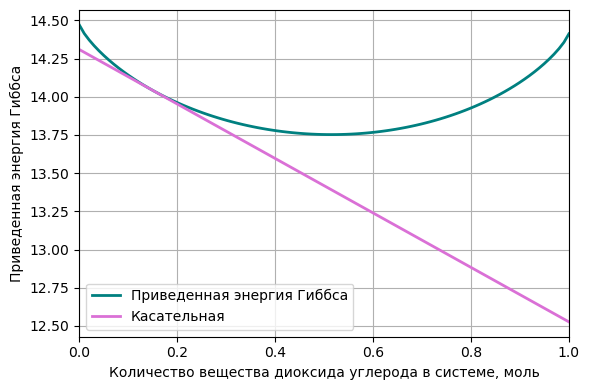

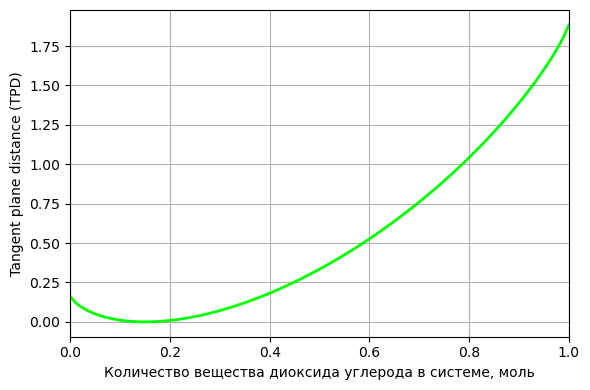

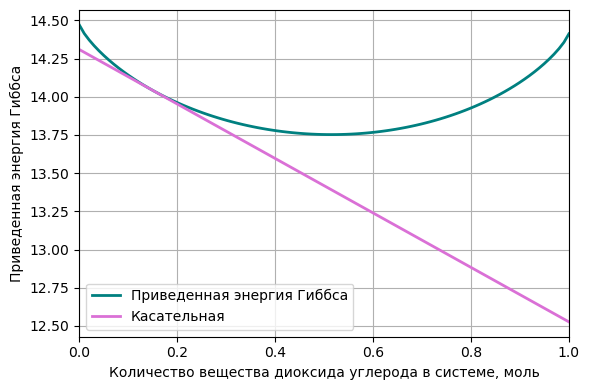

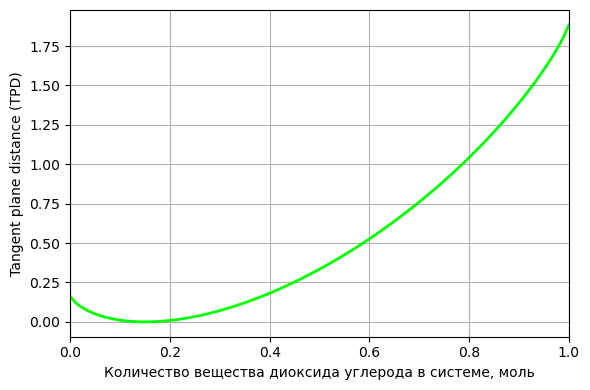

In [1]:
import numpy as np
P = np.float64(2e6) # Pressure [Pa]
T = np.float64(40. + 273.15) # Temperature [K]
yi = np.array([.15, .85]) # Mole fractions [fr.]

Pci = np.array([7.37646, 4.600155]) * 1e6 # Critical pressures [Pa]
Tci = np.array([304.2, 190.6]) # Critical temperatures [K]
wi = np.array([.225, .008]) # Acentric factors
mwi = np.array([0.04401, 0.016043]) # Molar mass [kg/gmole]
vsi = np.array([0., 0.]) # Volume shift parameters
dij = np.array([.025]) # Binary interaction parameters

import sys
sys.path.append('../../_src/')
from eos import pr78
pr = pr78(Pci, Tci, wi, mwi, vsi, dij)

yj1 = np.linspace(1e-4, 0.9999, 100, endpoint=True)
yji = np.vstack([yj1, 1. - yj1]).T
lnphiji, Zj = pr.get_lnphiji_Zj(P, T, yji)
lnfji = lnphiji + np.log(P * yji)
Gj = np.sum(yji * lnfji, axis=1)

lnfi = pr.get_lnfi(P, T, yi)
Lj = np.sum(yji * lnfi, axis=1)

from matplotlib import pyplot as plt
fig1, ax1 = plt.subplots(1, 1, figsize=(6., 4.), tight_layout=True)
ax1.plot(yj1, Gj, lw=2., c='teal', zorder=2, label='Приведенная энергия Гиббса')
ax1.plot(yj1, Lj, lw=2., c='orchid', zorder=2, label='Касательная')
ax1.grid()
ax1.set_xlim(0., 1.)
ax1.set_xlabel('Количество вещества диоксида углерода в системе, моль')
ax1.set_ylabel('Приведенная энергия Гиббса')
ax1.legend(loc=3)

Dj = Gj - Lj
fig2, ax2 = plt.subplots(1, 1, figsize=(6., 4.), tight_layout=True)
ax2.plot(yj1, Dj, lw=2., c='lime', zorder=2)
ax2.grid()
ax2.set_xlim(0., 1.)
ax2.set_xlabel('Количество вещества диоксида углерода в системе, моль')
ax2.set_ylabel('Tangent plane distance (TPD)')

from myst_nb import glue
glue('glued_fig1', fig1)
glue('glued_fig2', fig2)

```{admonition} Пример
:class: exercise
Пусть имеется $1 \; моль$ смеси из метана и диоксида углерода при температуре $10 \; ^{\circ} C$ и давлении $6 \; МПа$ с мольной долей метана $0.1$. Необходимо определить, является ли однофазное состояние данной системы стабильным.
```

````{dropdown} Решение
Зададим исходные термобарические условия и компонентный состав.

``` python
P = np.float64(6e6) # Pressure [Pa]
T = np.float64(10. + 273.15) # Temperature [K]
yi = np.array([.9, .1]) # Mole fractions [fr.]
```

Выполним расчет приведенной энергии Гиббса для всех возможных компонентных составов рассматриваемой смеси. Затем определим летучести компонентов и энергии Гиббса для соответствующих компонентных составов.

``` python
lnphiji, Zj = pr.get_lnphiji_Zj(P, T, yji)
lnfji = lnphiji + np.log(P * yji)
Gj = np.sum(yji * lnfji, axis=1)
```

Теперь вычислим летучести компонентов для заданного компонентного состава. Затем определим значения касательной к функции энергии Гиббса в точке с рассматриваемым компонентным составом.

``` python
lnfi = pr.get_lnfi(P, T, yi)
Lj = np.sum(yji * lnfi, axis=1)
```

Построим зависимости энергии Гиббса и касательной к ней от количества вещества диоксида углерода в системе.

``` python
from matplotlib import pyplot as plt
fig3, ax3 = plt.subplots(1, 1, figsize=(6., 4.), tight_layout=True)
ax3.plot(yj1, Gj, lw=2., c='teal', zorder=2, label='Приведенная энергия Гиббса')
ax3.plot(yj1, Lj, lw=2., c='orchid', zorder=2, label='Касательная')
ax3.grid()
ax3.set_xlim(0., 1.)
ax3.set_xlabel('Количество вещества диоксида углерода в системе, моль')
ax3.set_ylabel('Приведенная энергия Гиббса')
ax3.legend(loc=4)
plt.show()
```

```{glue:} glued_fig3
```

<br>
<br>

Поскольку видно, что касательная, проведенная к функции энергии Гиббса в точке с рассматриваемым компонентным составом пересекает функцию энергии Гиббса, то однофазное состояние данной системы нестабильно. Построим зависимость функции TPD.

``` python
Dj = Gj - Lj
fig4, ax4 = plt.subplots(1, 1, figsize=(6., 4.), tight_layout=True)
ax4.plot(yj1, Dj, lw=2., c='lime', zorder=2)
ax4.grid()
ax4.set_xlim(0., 1.)
ax4.set_xlabel('Количество вещества диоксида углерода в системе, моль')
ax4.set_ylabel('Tangent plane distance (TPD)')
plt.show()
```

```{glue:} glued_fig4
```

<br>
<br>

Функция TPD имеет отрицательные значения, что свидетельствует о пересечении касательной и функции энергии Гиббса, то есть о нестабильности рассматриваемой системы.

````

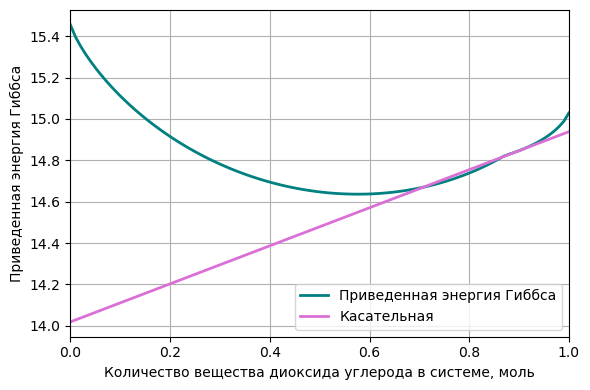

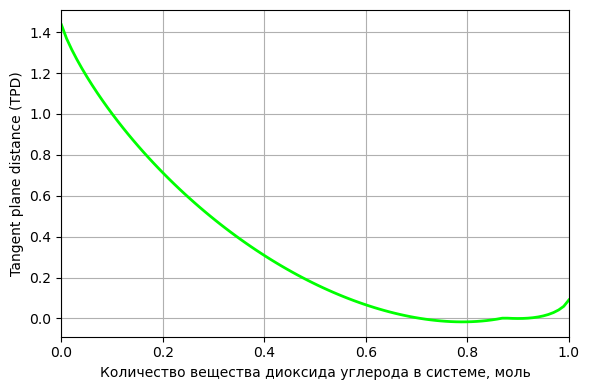

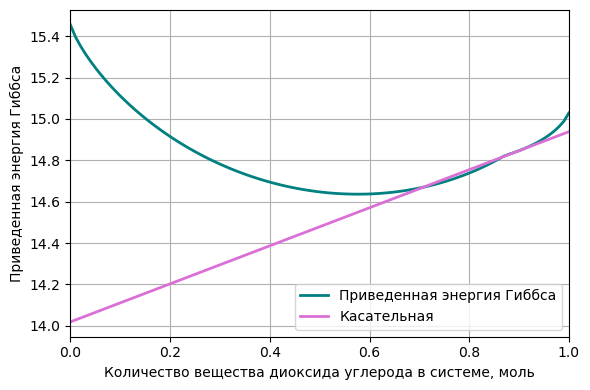

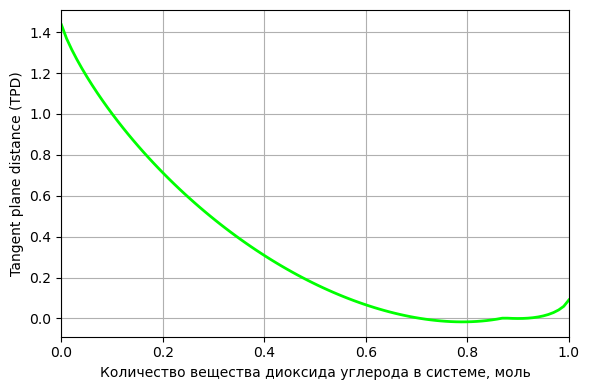

In [2]:
P = np.float64(6e6) # Pressure [Pa]
T = np.float64(10. + 273.15) # Temperature [K]
yi = np.array([.9, .1]) # Mole fractions [fr.]

lnphiji, Zj = pr.get_lnphiji_Zj(P, T, yji)
lnfji = lnphiji + np.log(P * yji)
Gj = np.sum(yji * lnfji, axis=1)

lnfi = pr.get_lnfi(P, T, yi)
Lj = np.sum(yji * lnfi, axis=1)

from matplotlib import pyplot as plt
fig3, ax3 = plt.subplots(1, 1, figsize=(6., 4.), tight_layout=True)
ax3.plot(yj1, Gj, lw=2., c='teal', zorder=2, label='Приведенная энергия Гиббса')
ax3.plot(yj1, Lj, lw=2., c='orchid', zorder=2, label='Касательная')
ax3.grid()
ax3.set_xlim(0., 1.)
ax3.set_xlabel('Количество вещества диоксида углерода в системе, моль')
ax3.set_ylabel('Приведенная энергия Гиббса')
ax3.legend(loc=4)

Dj = Gj - Lj
fig4, ax4 = plt.subplots(1, 1, figsize=(6., 4.), tight_layout=True)
ax4.plot(yj1, Dj, lw=2., c='lime', zorder=2)
ax4.grid()
ax4.set_xlim(0., 1.)
ax4.set_xlabel('Количество вещества диоксида углерода в системе, моль')
ax4.set_ylabel('Tangent plane distance (TPD)')

glue('glued_fig3', fig3)
glue('glued_fig4', fig4)

Представленные выше примеры наглядно демонстрируют применение графического метода, основанного на пересечении касательной гиперплоскости гиперповерхности функции энергии Гиббса. Однако применение графического метода не подходит для решения задач гидродинамического моделирования. Таким образом, была необходима разработка численных методов анализа стабильности фазового состояния системы. Эта задача была впервые успешно решена в работе \[[Michelsen, 1982](https://doi.org/10.1016/0378-3812(82)85001-2)\]. Суть данного метода заключается в следующем. Для того чтобы понять, является ли фазовое состояние некоторой системы стабильным, в соответствии с изложенным выше, необходимо понять, имеется ли пересечение гиперповерхности функции энергии Гиббса и касательной гиперплоскости, проведенной к гиперповерхности функции энергии Гиббса в точке с рассматриваемым компонентным составом. Это же условие равносильно анализу значений функции *TPD – tangent plane distance*: если функция TPD имеет отрицательные значения, то рассматриваемое фазовое состояние системы не является стабильным. Таким образом, задачу анализа стабильности можно представить в качестве задачи минимизации функции TPD:

```{admonition} NB
:class: note
Необходимым критерием стабильности рассматриваемого фазового состояния системы с количествами вещества компонентов $\mathbf{n}$ является:

$$ \begin{align}
D \left( \mathbf{r} \right)
&= G \left( \mathbf{r} \right) - \sum_{i=1}^{N_c} \mu_i \left( \mathbf{z} \right) r_i \\
&= \sum_{i=1}^{N_c} \mu_i \left( \mathbf{y} \right) r_i - \sum_{i=1}^{N_c} \mu_i \left( \mathbf{z} \right) r_i \\
&= \sum_{i=1}^{N_c} r_i \left( \mu_i \left( \mathbf{y} \right) - \mu_i \left( \mathbf{z} \right) \right) \geq 0, \; \forall \, \mathbf{r} \, : \, \sum_{i=1}^{N_c} r_i \leq \sum_{i=1}^{N_c} n_i, \; \mathbf{r} > 0,
\end{align} $$

где:
$\mathbf{r}$ – произвольный состав рассматриваемой системы, моль;
$\mathbf{y} = \mathbf{r} / \sum_{i=1}^{N_c} r_i$ – мольные доли компонентов для произвольного состава, д.ед.;
$\mathbf{\mu} \left( \mathbf{y} \right)$ – химические потенциалы компонентов для произвольного состава системы, Дж/моль.;
$\mathbf{z} = \mathbf{n} / \sum_{i=1}^{N_c} n_i$ – заданный компонентный состав системы, д.ед.;
$\mathbf{\mu} \left( \mathbf{z} \right)$ – химические потенциалы компонентов для заданного компонентного состава системы, Дж/моль.
```

Естественно, нет необходимости проверять значение функции TPD для всех составов системы, достаточно проверить значение функции TPD в ее глобальном минимуме: если в этой точке функция TPD неотрицательна, то систему можно считать стабильной. Однако поиск глобального минимума является достаточно сложной задачей для не выпуклых вниз функций. Таким образом, в работе \[[Michelsen, 1982](https://doi.org/10.1016/0378-3812(82)85001-2)\] было предложено заменить поиск глобального минимума функции TPD на проверку ее значений в локальных минимумах (стационарных точках). Для этого, задаваясь некоторым начальным приближением, находится локальный минимум, и проверяется значение функции TPD в нем. Если это значение меньше нуля, то рассматриваемое фазовое состояние считается нестабильным, и проверка заканчивается. Если же это значение неотрицательно, то рассматривается следующее начальное приближение. Алгоритм повторяется, пока не будут рассмотрены все начальные приближения. Если после рассмотрения всех начальных приближений не было получено отрицательное значение функции TPD, то система считается стабильной. Прежде чем переходить к рассмотрению реализаций данного алгоритма, необходимо получить условие стационарности (выражение, определяющее положение стационарных точек) функции TPD.

Для этого в представленном выше критерии стабильности фазового состояния системы разделим левую и правую часть на $\sum_{i=1}^{N_c} r_i > 0$:

$$ D \left( \mathbf{y} \right) = \sum_{i=1}^{N_c} y_i \left( \mu_i \left( \mathbf{y} \right) - \mu_i \left( \mathbf{z} \right) \right) .$$

Положение стационарных точек функции определяется равенством нулю частных производных по независимым переменным. В качестве независимых переменных будут выступать мольные доли компонентов $y_j, \; j = 1 \, \ldots \, N_c - 1$, поскольку:

$$ y_{N_c} = 1 - \sum_{i=1}^{N_c-1} y_i. $$

Запишем и преобразуем выражение для частных производных функции TPD:

$$ \begin{align}
\frac{\partial D}{\partial y_j}
&= \sum_{i=1}^{N_c} \frac{\partial y_i}{\partial y_j} \left( \mu_i \left( \mathbf{y} \right) - \mu_i \left( \mathbf{z} \right) \right) + \sum_{i=1}^{N_c} y_i \frac{\partial \mu_i \left( \mathbf{y} \right)}{\partial y_j} \\
&= \sum_{i=1}^{N_c} \frac{\partial y_i}{\partial y_j} \left( \mu_i \left( \mathbf{y} \right) - \mu_i \left( \mathbf{z} \right) \right) \\
&= \left( \mu_j \left( \mathbf{y} \right) - \mu_j \left( \mathbf{z} \right) \right) - \left( \mu_{N_c} \left( \mathbf{y} \right) - \mu_{N_c} \left( \mathbf{z} \right) \right) \\
&= 0, \; j = 1 \, \ldots \, N_c - 1.
\end{align} $$

В процессе этого преобразования было использовано [соотношение Гиббса-Дюгема](../1-TD/TD-12-GibbsDuhemEquation.md) при постоянных давлении и температуре:

$$ \sum_{i=1}^{N_c} y_i \frac{\partial \mu_i \left( \mathbf{y} \right)}{\partial y_j} = 0. $$

Кроме того, частная производная $\frac{\partial y_i}{\partial y_j}$ принимает следующие значения:

$$ \frac{\partial y_i}{\partial y_j} = \begin{cases} 1, & i=j, \, i = 1 \, \ldots \, N_c -1; \\ -1, & i=j, \, i = N_c; \\ 0, & i \neq j. \end{cases} $$

Следовательно,

$$ \mu_i \left( \mathbf{y} \right) - \mu_i \left( \mathbf{z} \right) = \mu_{N_c} \left( \mathbf{y} \right) - \mu_{N_c} \left( \mathbf{z} \right) = K, \; i = 1 \, \ldots \, N_c - 1. $$

В данном выражении разность химических потенциалов последнего компонента обозначена константой $K$, поскольку она не зависит от индекса $i$, то есть является одинаковой (постоянной) для всех компонентов. Иными словами, разность химических потенциалов одинакова для соответствующих компонентов в стационарных точках функции TPD. Из этого следует, что касательные, проведенные к функции энергии Гиббса в точках, соответствующих стационарным точкам функции TPD, будут параллельны друг другу и касательной, проведенной в точке с рассматриваемым компонентным составом. Действительно, из приведенного выше соотношения выразим значения химического потенциала в точке, соответствующей стационарной точке функции TPD:

$$ \mu_i \left( \mathbf{y} \right) = \mu_i \left( \mathbf{z}^0 \right) + K. $$

Тогда, согласно представленной выше теореме, уравнение касательной к функции энергии Гиббса в этой точке с компонентным составом $\mathbf{y}$:

$$ L_y \left( \mathbf{x} \right) = \sum_{i=1}^{N_c} \mu_i \left( \mathbf{y} \right) x_i = \sum_{i=1}^{N_c} \mu_i \left( \mathbf{z} \right) x_i + K \sum_{i=1}^{N_c} x_i = L_z \left( \mathbf{x} \right) + K .$$

При этом, значение функции TPD в стационарной точке:

$$ D \left( \mathbf{y} \right) = \sum_{i=1}^{N_c} y_i \left( \mu_i \left( \mathbf{y} \right) - \mu_i \left( \mathbf{z} \right) \right) = K. $$

Тогда условие стабильности рассматриваемой системы $D \left( \mathbf{y} \right) \geq 0$ можно представить в виде $K \geq 0$.

Подробнее рассмотрим условие стационарности функции TPD, которое представляет собой систему нелинейных уравнений:

$$ \mu_i \left( \mathbf{y} \right) - \mu_i \left( \mathbf{z} \right) = K, \; i = 1 \, \ldots \, N_c. $$

Эта система имеет тривиальное решение $\mathbf{y} = \mathbf{z}$, в этом случае $K = 0$. При постоянных давлении и температуре химические потенциалы можно заменить на летучести:

$$ \ln y_i + \ln \phi_i \left( \mathbf{y} \right) - h_i = K, \; i = 1 \, \ldots \, N_c. $$

Здесь под переменной $h_i$ обозначено следующее:

$$ h_i = \ln \phi_i \left( \mathbf{z} \right) + \ln z_i, \; i = 1 \, \ldots \, N_c. $$

Пусть $Y_i = y_i \mathrm{e}^{-K}$, тогда:

$$ \ln Y_i + \ln \phi_i \left( \mathbf{y} \right) - h_i = 0, \; i = 1 \, \ldots \, N_c. $$

Значения $Y_i$ можно условно интерпретировать как количество вещества $i$-го компонента, действительно:

$$ \frac{Y_i}{\sum_{i=1}^{N_c} Y_i} = \frac{y_i \mathrm{e}^{-K}}{\sum_{i=1}^{N_c} y_i \mathrm{e}^{-K}} = \frac{y_i \mathrm{e}^{-K}}{\mathrm{e}^{-K} \sum_{i=1}^{N_c} y_i} = y_i. $$

Условие стабильности $K \geq 0$ можно представить в виде $\sum_{i=1}^{N_c} Y_i \leq 1$.

Таким образом, мы можем использовать метод [градиентного спуска](../../0-Math/1-OM/OM-0-Introduction.md) для поиска локального минимума функции TPD и, задаваясь различными начальными приближениями, определить стабильность рассматриваемой системы. Очевидным недостатком данного подхода является конечность набора начальных приближений (и с точки зрения времени счета – их количество, ведь чем больше начальных приближений мы рассмотрим, тем с большей вероятностью найдем глобальный минимум функции TPD, однако это приведет к увеличению времени работы алгоритма), следовательно, корректный выбор начальных приближений является одним из залогов успешного решения задачи определения стабильности фазового состояния системы.

Обозначим отношение $Y_i$ к $z_i$ переменной $k_i$. В работе \[[Michelsen, 1982](https://doi.org/10.1016/0378-3812(82)85001-2)\] было предложено использовать корреляцию Уилсона:

$$ k_i^{go} = \frac{{P_c}_i}{P} \mathrm{e}^{5.3727 \left(1 + \omega_i \right) \left(1 - \frac{{T_c}_i}{T} \right)}. $$

То есть в качестве начальных приближений $k_i$ в работе \[[Michelsen, 1982](https://doi.org/10.1016/0378-3812(82)85001-2)\] выступал набор из следующих векторов:

$$ k_i = \left\{ k_i^{go}, \; \frac{1}{k_i^{go}} \right\}. $$

Использование этих двух начальных приближений зачастую бывает достаточно для проверки стабильности фазового равновесия, если заранее известно, что в системе могут быть только жидкая и газовая углероводородные фазы. Впоследствии, в работе \[[Li and Firoozabadi, 2012](https://doi.org/10.2118/129844-PA)\] было предложено дополнить данный набор следующими начальными приближениями:

$$ k_i = \left\{ k_i^{go}, \; \frac{1}{k_i^{go}}, \; \sqrt[3]{k_i^{go}}, \; \frac{1}{\sqrt[3]{k_i^{go}}}, \; k_i^{pure} \right\}, $$

где:

$$ k_i^{pure} = \begin{cases} \left(1 - \epsilon \right) / z_i, & i = \mathrm{specific \, component}, \\ \left( \epsilon / \left( N_c - 1 \right) \right) / z_i, & i = \mathrm{others}. \end{cases} $$

Данный набор начальных приближений хорошо подходит для проверки стабильности систем, где мольная доля одного компонента много больше мольных долей других. Например, к таким системам относятся системы с водой в качестве компонента, в этом случае $\epsilon = 1\mathrm{e}-3$, согласно \[[Connolly et al, 2019](https://doi.org/10.1021/acs.iecr.9b00695)\] (для водных растворов иногда имеет смысл задать $\epsilon = 1\mathrm{e}-15$, согласно \[[Li and Li](https://doi.org/10.1016/j.fuel.2019.02.026)\]). Для систем с высоким содержанием диоксида углерода рекомендуется $\epsilon = 0.05$, согласно \[[Imai at al, 2019](https://doi.org/10.1016/j.fluid.2019.06.002)\].

Существует также множество работ, посвященных разработке численных алгоритмов решения задачи стабильности. В работе \[[Michelsen, 1982](https://doi.org/10.1016/0378-3812(82)85001-2)\] было предложено использовать метод последовательных подстановок, а также метод BFGS с учетом замены переменной $\alpha_i = 2 \sqrt{Y_i}$ для решения задачи стабильности. Впоследсвтии применение метода BFGS для решение задачи стабильности получило свое развитие в работах \[[Hoteit and Firoozabadi, 2006](https://doi.org/10.1002/aic.10908); [Nichita and Petitfrere, 2015](https://doi.org/10.1016/j.fluid.2015.07.035)\]. Кроме того, было исследовано применение методов глобальной оптимизации для решения данной задачи, например, авторами работы \[[Nichita et al, 2002](http://doi.org/10.1016/S0378-3812(01)00779-8)\]. Далее будет кратко представлен метод *QNSS (quasi-Newton successive substitution)*, который будет использоваться для решения задачи стабильности системы при известных давлении и температуре. Более подробно данный метод изложен в работах \[[Nghiem, 1983](https://doi.org/10.2118/12242-MS); [Nghiem and Li, 1984](https://doi.org/10.1016/0378-3812(84)80013-8)\].

```{eval-rst}
.. role:: comment
    :class: comment
```

```{admonition} Алгоритм. Анализ стабильности с использованием QNSS
:class: algorithm

**Дано:** Вектор компонентного состава исследуемой системы $\mathbf{z} \in {\rm I\!R}^{N_c}$; термобарические условия $P$ и $T$; необходимые свойства компонентов для нахождения коэффициентов летучести компонентов с использованием уравнения состояния; максимальное число итераций $N_{iter}$; точность решения системы нелинейных уравнений $\epsilon_1$; численная погрешность расчета $0 < \epsilon_2 \leq 10^{-4}$.

**Определить:** Является ли однофазное состояние системы с компонентным составом $\mathbf{y}$ при давлении $P$ и температуре $T$ стабильным.

**Псевдокод:**  
**def** $\phi \left( \mathbf{y} \in {\rm I\!R}^{N_c}, \, \ldots \right) \rightarrow \mathbf{\varphi} \in {\rm I\!R}^{N_c}$ {comment}`# Функция для расчета вектора коэффициентов летучести`  
$\mathbf{K} := \left\{ \mathbf{k}_0, \, \mathbf{k}_1, \, \ldots, \, \mathbf{k}_N \right\}$ {comment}`# Инициализация набора (матрицы) начальных приближений`  
$\mathbf{h} := \ln \phi \left( \mathbf{z} \right) + \ln \mathbf{z}$  {comment}`# Расчет коэффициентов летучести для начального состава`  
**for** $i := 1$ **to** $N$ **do** {comment}`# Цикл перебора начальных приближений`  
&emsp;$\mathbf{k} := \mathbf{K}\left[ i \right]$ {comment}`# Вектор основных переменных`  
&emsp;$\mathbf{n} := \mathbf{k} \cdot \mathbf{z}$  
&emsp;$\mathbf{y} := \mathbf{n} \, / \, \sum_{i=1}^{N_c} n_i$  
&emsp;$\mathbf{g} := \ln \mathbf{n} + \ln \phi \left( \mathbf{y} \right) - \mathbf{h}$ {comment}`# Вектор невязок`  
&emsp;$c := 1$ {comment}`# Счетчик итераций решения системы нелинейных уравнений`  
&emsp;$\lambda := 1$ {comment}`# Коэффициент релаксации (длина шага)`  
&emsp;**while** $\lVert \mathbf{g} \rVert_2 > \epsilon_1$ **and** $c < N_{iter}$ **do** {comment}`# Цикл решения системы нелинейных уравнений`  
&emsp;&emsp;$\mathbf{\Delta \ln k} := -\lambda \cdot \mathbf{g}$ {comment}`# Вектор направления поиска решения`  
&emsp;&emsp;**if** $\max \left( \left| \mathbf{\Delta \ln k} \right| \right) > 6$ **then** {comment}`# Проверка на модуль вариации переменной для каждого компонента`  
&emsp;&emsp;&emsp;$\lambda := \lambda \cdot 6 \, / \max \left( \left| \mathbf{\Delta \ln k} \right| \right)$ {comment}`# Корректировка длины шага`  
&emsp;&emsp;&emsp;$\mathbf{\Delta \ln k} := \mathbf{\Delta \ln k} \cdot 6 \, / \max \left( \left| \mathbf{\Delta \ln k} \right| \right)$ {comment}`# Корректировка вектора направления поиска решения`  
&emsp;&emsp;**end if**  
&emsp;&emsp;$\mathbf{g}_{\left( -1 \right)} := \mathbf{g}$ {comment}`# Сохранение предыдущих значений вектора невязок`  
&emsp;&emsp;$\mathbf{k} := \mathbf{k} \cdot \exp \left( \mathbf{\Delta \ln k} \right)$ {comment}`# Расчет новых значений вектора основных переменных`  
&emsp;&emsp;$\mathbf{n} := \mathbf{k} \cdot \mathbf{z}$  
&emsp;&emsp;$\mathbf{y} := \mathbf{n} \, / \, \sum_{i=1}^{N_c} n_i$  
&emsp;&emsp;$\mathbf{g} := \ln \mathbf{n} + \ln \phi \left( \mathbf{y} \right) - \mathbf{h}$ {comment}`# Новые значения вектора невязок`  
&emsp;&emsp;$\lambda := \lambda \left| \frac{\left(\mathbf{\Delta \ln k} \right)^\top \mathbf{g}_{\left( -1 \right)}}{\left(\mathbf{\Delta \ln k} \right)^\top \left(\mathbf{g} \, - \, \mathbf{g}_{\left( -1 \right)} \right)} \right|$ {comment}`# Новое значение коэффициента релаксации`  
&emsp;&emsp;$c := c + 1$ {comment}`# Обновление счетчика итераций`  
&emsp;**end while**  
&emsp;$TPD := - \ln \sum_{i=1}^{N_c} n_i$ {comment}`# Расчет значения функции TPD`  
&emsp;**if** $TPD < -\epsilon_2$ **and** $c < N_{iter}$ **then** {comment}`# Проверка условия стабильности`  
&emsp;&emsp;$is\_stable := \mathrm{False}$  
&emsp;&emsp;**exit for** {comment}`# Выход из цикла перебора начальных приближений`  
&emsp;**else**  
&emsp;&emsp;**continue**  
&emsp;**end if**  
**else**  
&emsp;$is\_stable := \mathrm{True}$  
**end for**  
```

Рассмотрим реализацию данного алгоритма для приведенных выше примеров.

```{admonition} Пример
:class: exercise
Пусть имеется $1 \; моль$ смеси из метана и диоксида углерода при температуре $40 \; ^{\circ} C$ и давлении $2 \; МПа$ с мольной долей метана $0.85$. Необходимо определить, является ли однофазное состояние данной системы стабильным, с использованием численного алгоритма.
```

````{dropdown} Решение
Зададим исходные термобарические условия и компонентный состав.

``` python
P = np.float64(2e6) # Pressure [Pa]
T = np.float64(40. + 273.15) # Temperature [K]
yi = np.array([.15, .85]) # Mole fractions [fr.]
```

Также зададим максимальное число итераций $N_{iter}$, точность решения системы нелинейных уравнений $\epsilon_1$, численную погрешность расчета $\epsilon_2$:

``` python
Niter = 50 # Number of iterations
eps1 = np.float64(1e-6) # Tolerance
eps2 = np.float64(1e-4)
```

Рассчитаем матрицу начальных приближений $\mathbf{K}$. Для данного примера нам будет достаточно два приближения, рассчитанных по уравнению Уилсона:

``` python
ki = Pci * np.exp(5.3727 * (1. + wi) * (1. - Tci / T)) / P # Wilson's correlation
K = np.vstack([ki, 1. / ki]) # Matrix of initial estimates
```

Создадим функцию, которая будет принимать на вход кортеж из результатов предыдущей итерации, точность и максимальное число итераций, и возвращать необходимость расчета следующей итерации цикла решения системы нелинейных уравнений:

``` python
import numpy.typing as npt

def condit(
    carry: tuple[int, npt.NDArray[np.float64], npt.NDArray[np.float64], np.float64],
    tol: np.float64,
    Niter: int,
) -> bool:
    k, ki, gi, lmbd = carry
    return (k < Niter) & (np.linalg.norm(gi) > tol)
```

Также создадим функцию, которая будет принимать на вход результаты предыдущей итерации в виде кортежа, и рассчитывать результаты для новой итерации:

``` python
from typing import Callable

def update(
    carry: tuple[int, npt.NDArray[np.float64], npt.NDArray[np.float64], np.float64],
    hi: npt.NDArray[np.float64],
    yi: npt.NDArray[np.float64],
    plnphi: Callable[[npt.NDArray[np.float64]], npt.NDArray[np.float64]],
) -> tuple[int, npt.NDArray[np.float64], npt.NDArray[np.float64], np.float64]:
    k, ki_k, gi_k, lmbd_k = carry
    dlnki = -lmbd_k * gi_k
    max_dlnki = np.abs(dlnki).max()
    if max_dlnki > 6.:
        relax = 6. / max_dlnki
        dlnki *= relax
    else:
        relax = 1.
    ki_kp1 = ki_k * np.exp(dlnki)
    ni = ki_kp1 * yi
    gi_kp1 = np.log(ni) + plnphi(yi=ni/ni.sum()) - hi
    lmbd_kp1 = (lmbd_k * relax) * np.abs(dlnki.dot(gi_k) / dlnki.dot(gi_kp1 - gi_k))
    if lmbd_kp1 > 30.:
        lmbd_kp1 = 30.
    return k + 1, ki_kp1, gi_kp1, lmbd_kp1
```

Выполним расчет коэффициентов летучести для начального компонентного состава:

``` python
hi = pr.get_lnphii(P, T, yi) + np.log(yi)
```

Проинициализируем функции `condit` и `update`:

``` python
from functools import partial

pcondit = partial(condit, tol=eps1, Niter=Niter)
pupdate = partial(update, hi=hi, yi=yi, plnphi=partial(pr.get_lnphii, P=P, T=T))
```

Выполним расчет функции TPD для различных начальных приближений:

``` python
for i, ki in enumerate(K):
    ni = ki * yi
    gi = np.log(ni) + pr.get_lnphii(P=P, T=T, yi=ni/ni.sum()) - hi
    carry = (1, ki, gi, 1.)
    while pcondit(carry):
        carry = pupdate(carry)
    c, ki, gi, _ = carry
    ni = ki * yi
    TPD = -np.log(ni.sum())
    print(f'For the initial guess #{i}:')
    print(f'\ttolerance of equations: {np.linalg.norm(gi)}')
    print(f'\tnumber of iterations: {c}')
    print(f'\tsolution: {ni}')
    print(f'\tTPD: {TPD}\n')
    if (TPD < -eps2) & (c < Niter):
        is_stable = False
        break
else:
    is_stable = True

print(f'The system is stable: {is_stable}')
```

```{glue:} glued_out1
```

По результатам расчетов видно, что для обоих начальных приближений алгоритм сошелся на тривиальном решении, в котором значение TPD равно нулю. Таким образом, можно сделать вывод, что система стабильна.
````

In [3]:
P = np.float64(2e6) # Pressure [Pa]
T = np.float64(40. + 273.15) # Temperature [K]
yi = np.array([.15, .85]) # Mole fractions [fr.]

Niter = 50 # Number of iterations
eps1 = 1e-6 # Tolerance
eps2 = 1e-4

ki = Pci * np.exp(5.3727 * (1. + wi) * (1. - Tci / T)) / P # Wilson's correlation
K = np.vstack([ki, 1. / ki]) # Matrix of initial estimates

import numpy.typing as npt

def condit(
    carry: tuple[int, npt.NDArray[np.float64], npt.NDArray[np.float64], np.float64],
    tol: np.float64,
    Niter: int,
) -> bool:
    k, ki, gi, lmbd = carry
    return (k < Niter) & (np.linalg.norm(gi) > tol)

from typing import Callable

def update(
    carry: tuple[int, npt.NDArray[np.float64], npt.NDArray[np.float64], np.float64],
    hi: npt.NDArray[np.float64],
    yi: npt.NDArray[np.float64],
    plnphi: Callable[[npt.NDArray[np.float64]], npt.NDArray[np.float64]],
) -> tuple[int, npt.NDArray[np.float64], npt.NDArray[np.float64], np.float64]:
    k, ki_k, gi_k, lmbd_k = carry
    dlnki = -lmbd_k * gi_k
    max_dlnki = np.abs(dlnki).max()
    if max_dlnki > 6.:
        relax = 6. / max_dlnki
        dlnki *= relax
    else:
        relax = 1.
    ki_kp1 = ki_k * np.exp(dlnki)
    ni = ki_kp1 * yi
    gi_kp1 = np.log(ni) + plnphi(yi=ni/ni.sum()) - hi
    lmbd_kp1 = (lmbd_k * relax) * np.abs(dlnki.dot(gi_k) / dlnki.dot(gi_kp1 - gi_k))
    if lmbd_kp1 > 30.:
        lmbd_kp1 = 30.
    return k + 1, ki_kp1, gi_kp1, lmbd_kp1

hi = pr.get_lnphii(P, T, yi) + np.log(yi)

from functools import partial

pcondit = partial(condit, tol=eps1, Niter=Niter)
pupdate = partial(update, hi=hi, yi=yi, plnphi=partial(pr.get_lnphii, P=P, T=T))

out1 = ''

for i, ki in enumerate(K):
    ni = ki * yi
    gi = np.log(ni) + pr.get_lnphii(P=P, T=T, yi=ni/ni.sum()) - hi
    carry = (1, ki, gi, 1.)
    while pcondit(carry):
        carry = pupdate(carry)
    c, ki, gi, _ = carry
    ni = ki * yi
    TPD = -np.log(ni.sum())
    out1 += f'For the initial guess #{i}:\n'
    out1 += f'\ttolerance of equations: {np.linalg.norm(gi)}\n'
    out1 += f'\tnumber of iterations: {c}\n'
    out1 += f'\tsolution: {ni}\n'
    out1 += f'\tTPD: {TPD}\n'
    if (TPD < -eps2) & (c < Niter):
        is_stable = False
        break
else:
    is_stable = True

out1 += f'The system is stable: {is_stable}'

class MultilineText(object):
    def __init__(self, text):
        self.text = text
        self.template = """
<div class="output text_plain highlight-myst-ansi notranslate"><div class="highlight"><pre id="codecell20" tabindex="0"><span></span>{}
</pre><button class="copybtn o-tooltip--left" data-tooltip="Copy" data-clipboard-target="#codecell20">
      <svg xmlns="http://www.w3.org/2000/svg" class="icon icon-tabler icon-tabler-copy" width="44" height="44" viewBox="0 0 24 24" stroke-width="1.5" stroke="#000000" fill="none" stroke-linecap="round" stroke-linejoin="round">
  <title>Copy to clipboard</title>
  <path stroke="none" d="M0 0h24v24H0z" fill="none"></path>
  <rect x="8" y="8" width="12" height="12" rx="2"></rect>
  <path d="M16 8v-2a2 2 0 0 0 -2 -2h-8a2 2 0 0 0 -2 2v8a2 2 0 0 0 2 2h2"></path>
</svg>
    </button></div>
</div>
"""

    def _repr_html_(self):
        return self.template.format(self.text.replace('\n', '<br>'))

glue('glued_out1', MultilineText(out1))

Рассмотрим применение данного алгоритма для следующего примера.

```{admonition} Пример
:class: exercise
Пусть имеется $1 \; моль$ смеси из метана и диоксида углерода при температуре $10 \; ^{\circ} C$ и давлении $6 \; МПа$ с мольной долей метана $0.1$. Необходимо определить, является ли однофазное состояние данной системы стабильным, с использованием численного алгоритма.
```

````{dropdown} Решение
Зададим исходные термобарические условия и компонентный состав.

``` python
P = np.float64(6e6) # Pressure [Pa]
T = np.float64(10. + 273.15) # Temperature [K]
yi = np.array([.9, .1]) # Mole fractions [fr.]
```

Рассчитаем матрицу начальных приближений $\mathbf{K}$:

``` python
ki = Pci * np.exp(5.3727 * (1. + wi) * (1. - Tci / T)) / P # Wilson's correlation
K = np.vstack([ki, 1. / ki]) # Matrix of initial estimates
```

Выполним расчет коэффициентов летучести для начального компонентного состава:

``` python
hi = pr.get_lnphii(P, T, yi) + np.log(yi)
```

Проинициализируем функции `condit` и `update`:

``` python
pcondit = partial(condit, tol=eps1, Niter=Niter)
pupdate = partial(update, hi=hi, yi=yi, plnphi=partial(pr.get_lnphii, P=P, T=T))
```

Выполним расчет функции TPD для различных начальных приближений:

``` python
for i, ki in enumerate(K):
    ni = ki * yi
    gi = np.log(ni) + pr.get_lnphii(P=P, T=T, yi=ni/ni.sum()) - hi
    carry = (1, ki, gi, 1.)
    while pcondit(carry):
        carry = pupdate(carry)
    c, ki, gi, _ = carry
    ni = ki * yi
    TPD = -np.log(ni.sum())
    print(f'For the initial guess #{i}:')
    print(f'\ttolerance of equations: {np.linalg.norm(gi)}')
    print(f'\tnumber of iterations: {c}')
    print(f'\tsolution: {ni}')
    print(f'\tTPD: {TPD}\n')
    if (TPD < -eps2) & (c < Niter):
        is_stable = False
        break
else:
    is_stable = True

print(f'The system is stable: {is_stable}')
```

```{glue:} glued_out2
```

Реализованный алгоритм проверки стабильности уже для первого начального приближения нашел решение системы нелинейных уравнений, характеризующееся отрицательным значением функции TPD, следовательно, однофазное состояние не является стабильным.
````

In [4]:
P = np.float64(6e6) # Pressure [Pa]
T = np.float64(10. + 273.15) # Temperature [K]
yi = np.array([.9, .1]) # Mole fractions [fr.]

ki = Pci * np.exp(5.3727 * (1. + wi) * (1. - Tci / T)) / P # Wilson's correlation
K = np.vstack([ki, 1. / ki]) # Matrix of initial estimates

hi = pr.get_lnphii(P, T, yi) + np.log(yi)

pcondit = partial(condit, tol=eps1, Niter=Niter)
pupdate = partial(update, hi=hi, yi=yi, plnphi=partial(pr.get_lnphii, P=P, T=T))

out2 = ''

for i, ki in enumerate(K):
    ni = ki * yi
    gi = np.log(ni) + pr.get_lnphii(P=P, T=T, yi=ni/ni.sum()) - hi
    carry = (1, ki, gi, 1.)
    while pcondit(carry):
        carry = pupdate(carry)
    c, ki, gi, _ = carry
    ni = ki * yi
    TPD = -np.log(ni.sum())
    out2 += f'For the initial guess #{i}:\n'
    out2 += f'\ttolerance of equations: {np.linalg.norm(gi)}\n'
    out2 += f'\tnumber of iterations: {c}\n'
    out2 += f'\tsolution: {ni}\n'
    out2 += f'\tTPD: {TPD}\n'
    if (TPD < -eps2) & (c < Niter):
        is_stable = False
        break
else:
    is_stable = True

out2 += f'The system is stable: {is_stable}'

glue('glued_out2', MultilineText(out2))

Представленный выше алгоритм можно использовать для проверки стабильности однофазного состояния системы. Для проверки стабильности многофазной системы также можно использовать представленный выше алгоритм: для этого достаточно проверить стабильность любой из фаз.

Таким образом, в этом подразделе были выведен критерий стабильности для PT-термодинамики, а также представлен один из численных алгоритмов проверки стабильности фазового состояния. Пример реализации данного алгоритма представлен [здесь](https://github.com/DanielSkorov/ReservoirSimulation/blob/main/_src/stability.py). [Следующие разделы](SEC-2-RR.md) будут посвящены изучению уравнения Речфорда-Райса (уравнения фазовых концентраций).

(pvt-sec-stability-vt)=
## VT-термодинамика